# Alberto Pluecker - Projeto de Bloco: Inteligência Artificial e Machine Learning

## Carregamento de Dados: Identifique as características (features) e o alvo (target) nos conjuntos de dados, compreendendo sua estrutura e importância.

In [7]:
import pandas as pd

df = pd.read_csv('iris.csv').dropna()

features = df.drop(columns=['Species', 'Id'])
target = df['Species']

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Divisão de Dados: Separe os dados em conjuntos de treino e validação, essenciais para o desenvolvimento e avaliação de modelos de ML. Você irá dividir 80% dos dados para treino e o restante para validação. 

In [12]:
from sklearn.model_selection import train_test_split

features_treino, features_validacao, target_treino, target_validacao = train_test_split(features, target, test_size=0.2, random_state=30)

## Transformação de Dados: Utilize transformadores do Scikit-Learn para ajustar e padronizar as variáveis dos dados.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_treino_escaladas = scaler.fit_transform(features_treino)
features_validacao_escaladas = scaler.transform(features_validacao)

## Modelagem de K-Nearest Neighbors (KNN): Implemente e ajuste o algoritmo KNN, compreendendo suas nuances e aplicabilidade.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_treino_escaladas, target_treino)

KNeighborsClassifier(n_neighbors=3)

## Avaliação de Modelos: Avalie a qualidade do modelo desenvolvido usando acurácia

In [16]:
from sklearn.metrics import accuracy_score

predicoes_validacao = knn.predict(features_validacao_escaladas)
acuracia = accuracy_score(target_validacao, predicoes_validacao)

acuracia

1.0

## Análise de Parâmetros: Explore diferentes valores para o parâmetro K do KNN e analise seu impacto nos resultados obtidos (através da acurácia do modelo para os dados de validação).

In [20]:
k_values = range(1, 100, 2)
acuracias = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_treino_escaladas, target_treino)
    predicoes_validacao = knn.predict(features_validacao_escaladas)
    acuracia = accuracy_score(target_validacao, predicoes_validacao)
    acuracias.append(acuracia)
    print(f'K={k}: Acurácia = {acuracia:.3f}')

melhor_k = k_values[acuracias.index(max(acuracias))]
melhor_acuracia = max(acuracias)

K=1: Acurácia = 1.000
K=3: Acurácia = 1.000
K=5: Acurácia = 1.000
K=7: Acurácia = 1.000
K=9: Acurácia = 1.000
K=11: Acurácia = 1.000
K=13: Acurácia = 1.000
K=15: Acurácia = 1.000
K=17: Acurácia = 1.000
K=19: Acurácia = 1.000
K=21: Acurácia = 1.000
K=23: Acurácia = 1.000
K=25: Acurácia = 1.000
K=27: Acurácia = 1.000
K=29: Acurácia = 1.000
K=31: Acurácia = 1.000
K=33: Acurácia = 1.000
K=35: Acurácia = 0.967
K=37: Acurácia = 1.000
K=39: Acurácia = 1.000
K=41: Acurácia = 1.000
K=43: Acurácia = 1.000
K=45: Acurácia = 0.967
K=47: Acurácia = 0.967
K=49: Acurácia = 0.967
K=51: Acurácia = 0.967
K=53: Acurácia = 0.967
K=55: Acurácia = 0.967
K=57: Acurácia = 0.967
K=59: Acurácia = 0.967
K=61: Acurácia = 0.967
K=63: Acurácia = 0.967
K=65: Acurácia = 0.967
K=67: Acurácia = 0.967
K=69: Acurácia = 0.967
K=71: Acurácia = 0.967
K=73: Acurácia = 0.967
K=75: Acurácia = 0.967
K=77: Acurácia = 0.833
K=79: Acurácia = 0.533
K=81: Acurácia = 0.567
K=83: Acurácia = 0.333
K=85: Acurácia = 0.333
K=87: Acurácia =

O modelo tem uma acurácia perfeita (1.000) até K=33 e outros valores de K, tendendo a diminuir com K maior. Isso sugere que, para esses valores de K, o modelo é capaz de classificar corretamente todas as amostras no conjunto de validação.

A acurácia cai drasticamente para maiores valores de K, onde o modelo começa a generalizar demais e perder a capacidade de discriminar entre as diferentes calsses.

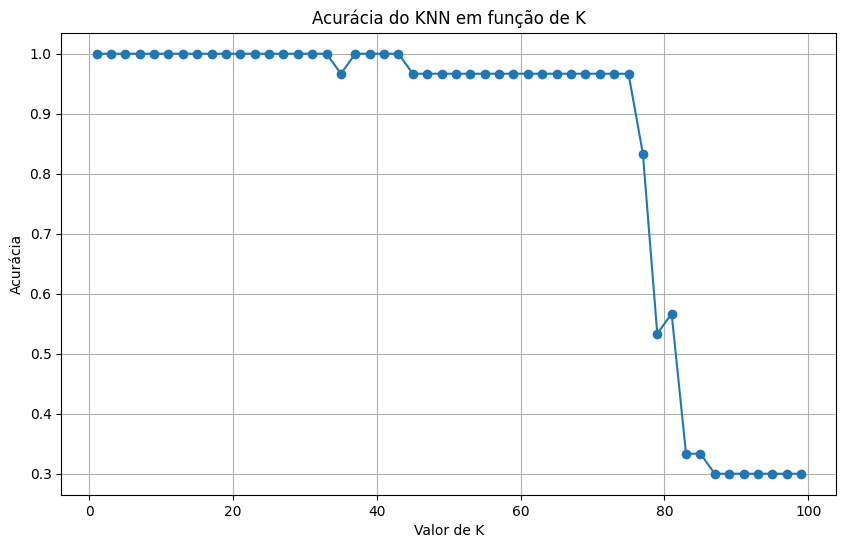

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, acuracias, marker='o')
plt.title('Acurácia do KNN em função de K')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()